In [2]:
import pandas as pd
import sqlite3

from datetime import datetime, timedelta

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
conn = sqlite3.connect('LeanTaaSTestDB.db')
df = pd.read_sql_query("select * from exchange_transactions;", conn)

In [4]:
df.head()

,transaction_id,parent_transaction_id,action,scheduler,surgeon,created_datetime,snapshot_date,start_time,end_time,room_name,location
0,2c91808267d2ea5301682f73e9a1093e,None,RELEASE,Jessie Shelley,Bryan Neer,2019-01-15 13:52:32.000000,2019-07-01 00:00:00.000000,07:30:00,19:00:00,MRAH OR 03,CENTER
1,2c91808267d2ea5301683984e52b0bfb,None,TRANSFER,Raymond Smith,Charles Mcdonald,2019-01-17 12:47:17.000000,2019-06-20 00:00:00.000000,07:30:00,19:00:00,MRAH OR 06,CENTER
2,2c91808267d2ea53016839855a480bfc,None,TRANSFER,Raymond Smith,Charles Mcdonald,2019-01-17 12:47:47.000000,2019-06-20 00:00:00.000000,07:30:00,19:00:00,MNOR 36,CENTER
3,2c91808267d2eb4b016829281a390786,None,RELEASE,Kimberly Bugg,Joann Hinson,2019-01-14 08:32:01.000000,2019-06-12 00:00:00.000000,08:50:00,19:00:00,MNOR 25,CENTER
4,2c91808267d2eb4b01682977274607cb,2c91808267d2eb4b016829281a390786,MARK_UPDATED,Dora Smith,Joann Hinson,2019-01-14 09:58:21.000000,2019-06-12 00:00:00.000000,08:50:00,19:00:00,MNOR 25,CENTER


In [5]:
df['end_time'] = pd.to_datetime(df['end_time'], format = '%H:%M:%S')

In [6]:
df['start_time'] = pd.to_datetime(df['start_time'], format = '%H:%M:%S')

In [7]:
time_delta = df['end_time'] - df['start_time']

In [8]:
df['duration'] = time_delta

In [9]:
td = []

for i in range(0, len(time_delta)):
    
    td.append(time_delta[i].total_seconds())

In [10]:
td = [i / 60 for i in td]

In [11]:
df.drop('duration', inplace = True, axis = 1)

In [12]:
df['duration_mins'] = td

In [13]:
df.head()

,transaction_id,parent_transaction_id,action,scheduler,surgeon,created_datetime,snapshot_date,start_time,end_time,room_name,location,duration_mins
0,2c91808267d2ea5301682f73e9a1093e,None,RELEASE,Jessie Shelley,Bryan Neer,2019-01-15 13:52:32.000000,2019-07-01 00:00:00.000000,1900-01-01 07:30:00,1900-01-01 19:00:00,MRAH OR 03,CENTER,690.0
1,2c91808267d2ea5301683984e52b0bfb,None,TRANSFER,Raymond Smith,Charles Mcdonald,2019-01-17 12:47:17.000000,2019-06-20 00:00:00.000000,1900-01-01 07:30:00,1900-01-01 19:00:00,MRAH OR 06,CENTER,690.0
2,2c91808267d2ea53016839855a480bfc,None,TRANSFER,Raymond Smith,Charles Mcdonald,2019-01-17 12:47:47.000000,2019-06-20 00:00:00.000000,1900-01-01 07:30:00,1900-01-01 19:00:00,MNOR 36,CENTER,690.0
3,2c91808267d2eb4b016829281a390786,None,RELEASE,Kimberly Bugg,Joann Hinson,2019-01-14 08:32:01.000000,2019-06-12 00:00:00.000000,1900-01-01 08:50:00,1900-01-01 19:00:00,MNOR 25,CENTER,610.0
4,2c91808267d2eb4b01682977274607cb,2c91808267d2eb4b016829281a390786,MARK_UPDATED,Dora Smith,Joann Hinson,2019-01-14 09:58:21.000000,2019-06-12 00:00:00.000000,1900-01-01 08:50:00,1900-01-01 19:00:00,MNOR 25,CENTER,610.0


In [14]:
duration_data = df.groupby(['action']).sum()

In [15]:
duration_data.reset_index(inplace = True)

In [17]:
duration_data.head()

,action,duration_mins
0,APPROVE_REQUEST,282655.0
1,APPROVE_TRANSFER,125815.0
2,DENY_RELEASE,9475.0
3,DENY_REQUEST,33225.0
4,DENY_TRANSFER,2535.0


[Text(0, 0.5, 'Task Duration in Minutes'), Text(0.5, 0, 'Action Category')]

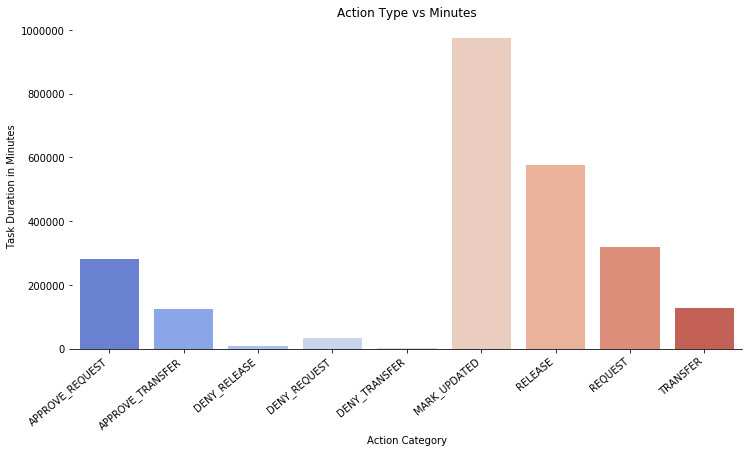

In [16]:
plt.figure(figsize=(12,6))
plt.title('Action Type vs Minutes')

sns.despine(left=True)
sns.barplot(y = 'duration_mins', x = 'action', data = duration_data, palette = 'coolwarm')

ax = sns.barplot(y = 'duration_mins', x = 'action', data = duration_data, palette = 'coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
ax.set(xlabel = 'Action Category', ylabel = 'Task Duration in Minutes')